In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import thick_sample_magnetic_phase as tp

The idea behind the algorithm of [Humphrey *et al.*](http://www.sciencedirect.com/science/article/pii/S0304399113000764)<sup>1</sup> is to approximate a 3D magnetic sample by a cubic lattice of spheres with uniform magnetization. The advantage of this is that the magnetic phase shift caused by a uniformly magnetized sphere can be calculated analytically, and a sphere is rotationally invariant. The total phase shift of the electron wave is then just computed as the summed contribution of all the spheres. Note that this model improves as the volume of the spheres decreases. In fact for materials where the magnetic moment resides predominantly on the atom sites this is more reflective of reality (I think this is true for rare earth magnets, probably not for itinerant ferromagnets i.e. Iron, Cobalt, Nickel). 


1. Humphrey, E. and De Graef, M., 2013. On the computation of the magnetic phase shift for magnetic nano-particles of arbitrary shape using a spherical projection model. Ultramicroscopy, 129, pp.36-41.

Before trying to simulate a complicated sample I will simulate a single sphere, to use as a reference.

In [2]:
mu = np.array([1.0,1.0,0.0], dtype=float)
mu /= np.sqrt(np.dot(mu,mu))

In [3]:
np.dot(mu,mu) #  check to make sure mu is normalized

0.99999999999999978

In [4]:
w = 2.5*10**2
X, Y = np.meshgrid(np.linspace(-w,w,512), np.linspace(-w,w,512))
pxsize = X[0,1]-X[0,0]

In [5]:
R = 75
r = np.sqrt(X**2+Y**2)<R

In [6]:
pxsize

0.97847358121330785

In [7]:
kx, ky, k_perp = tp.kx_ky_k_perp(pxsize/(2*np.pi), 512, 512)

In [8]:
Sx, Sy = tp.S_x_S_y(kx, ky, k_perp, R, 0.0001)

C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:53: RuntimeWarning: invalid value encountered in true_divide
  Sx = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*kx
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:53: RuntimeWarning: divide by zero encountered in true_divide
  Sx = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*kx
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:54: RuntimeWarning: invalid value encountered in true_divide
  Sy = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*ky
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:54: RuntimeWarning: divide by zero encountered in true_divide
  Sy = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*ky


Don't worry I replace all the nan values in the code. 

In [9]:
phi_mk = mu[0]*Sy-mu[1]*Sx

In [10]:
phi_m = -np.fft.fftshift(np.real(np.fft.ifft2(phi_mk)))

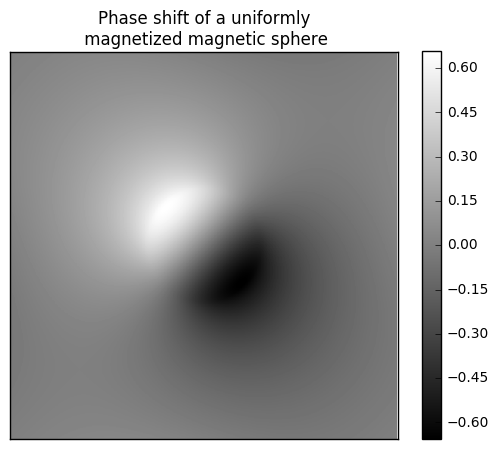

In [11]:
plt.figure(figsize=(12.5/2,10/2))
plt.imshow(phi_m, cmap='gray', interpolation='none', origin='lower')
plt.colorbar()
plt.yticks([])
plt.xticks([])
title = "Phase shift of a uniformly\n magnetized magnetic sphere"
plt.title(title)
plt.show()

In [12]:
from matplotlib import colors

In [13]:
#  This makes a color image with the color indicating direction and saturation the magnetude 
#  of the magnetic induction
G = np.gradient(phi_m)

C = np.zeros(G[0].shape + (3,), dtype='float')
C[..., 0] = (np.arctan2(G[0],G[1]) + 3*np.pi/4 + np.pi/6)/ (2 * np.pi) % 1 
# these extra pis are to get the color wheel to look the way I want
C[..., 1] = 1
C[..., 2] = np.sqrt(G[0]**2 + G[1]**2)/np.max(np.sqrt(G[0]**2 + G[1]**2))
C = colors.hsv_to_rgb(C)

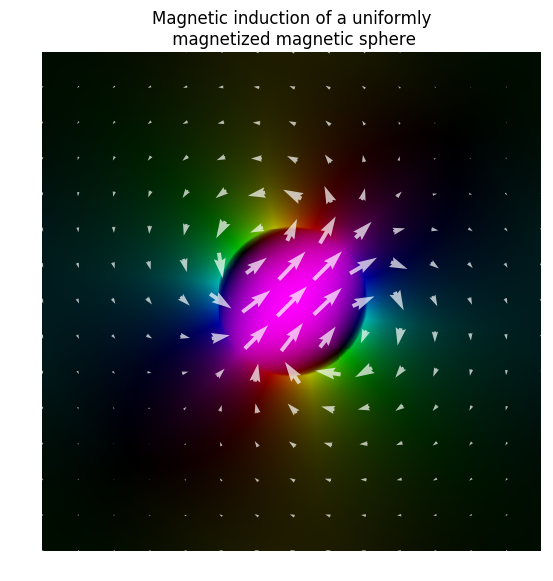

In [14]:
#  Make sure the magnetic induction looks correct 
G = np.gradient(phi_m)
pix = 35
Bx = G[0][::pix,::pix]
By = -G[1][::pix,::pix]
XX, YY = np.meshgrid(np.linspace(0, np.shape(G[0])[1], np.shape(Bx)[1]), 
                   np.linspace(0, np.shape(G[0])[0], np.shape(By)[0]))

fig = plt.figure(frameon=0, figsize=(5, 5))
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
ax.imshow(C, origin='lower', cmap='gray', interpolation='none')
ax.quiver(XX, YY, Bx, By, scale=0.15, minlength=0.0001, width=0.008, pivot='mid', 
          color='white', alpha=0.7)
plt.title("Magnetic induction of a uniformly\n magnetized magnetic sphere")
plt.axis('off')
plt.show()

Above the vector arrows and color indicate the direction and magnitude of the magnetic induction for a spherical particle.  

**Note** The apparent streaking (yellow, magenta, cyan look brighter) in the image is caused by the hsv color map. I used that color map here because it is quick and easy, but for publications our group has a more perceptually uniform color map.

In [15]:
def f(X,Y,Z,R):
    r = np.sqrt(X**2+Y**2+Z**2)
    out = r<R
    return out

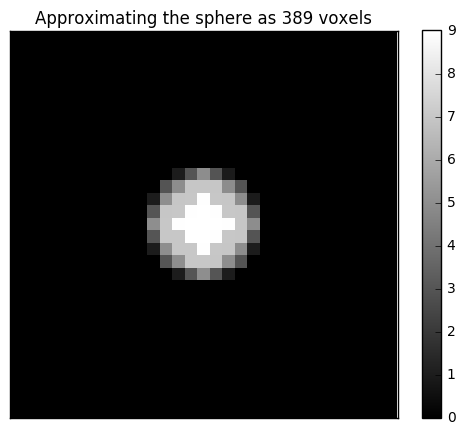

C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:53: RuntimeWarning: invalid value encountered in true_divide
  Sx = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*kx
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:53: RuntimeWarning: divide by zero encountered in true_divide
  Sx = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*kx
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:54: RuntimeWarning: invalid value encountered in true_divide
  Sy = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*ky
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:54: RuntimeWarning: divide by zero encountered in true_divide
  Sy = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*ky


In [16]:
w = 2.5*10**2
x_p, y_p, z_p = [np.linspace(-w,w,31)]*3
R = 75
data_p = f(*np.meshgrid(x_p, y_p, z_p, indexing='ij', sparse=True), R)
i_s, j_s, k_s = np.meshgrid(np.arange(len(x_p)), np.arange(len(y_p)), np.arange(len(z_p)), indexing='ij')
coords = np.array([i_s[data_p], j_s[data_p], k_s[data_p]])
i_s, j_s, k_s = coords

plt.figure(figsize=(12.5/2,10/2))
plt.imshow(np.sum(data_p, axis=0), cmap='gray', interpolation='none', origin='lower')
plt.colorbar()
plt.yticks([])
plt.xticks([])
title = "Approximating the sphere as %r voxels" % len(i_s)
plt.title(title)
plt.show()


mu = np.array([np.array(data_p, dtype=float),np.array(data_p, dtype=float),0.0*np.array(data_p, dtype=float)])/np.sqrt(2)
a = (x_p[1]-x_p[0])/2
delta = np.pi/4
R = 1.2407*a
kx, ky, k_perp = tp.kx_ky_k_perp(pxsize/(2*np.pi), 512, 512)
Sx, Sy = tp.S_x_S_y(kx, ky, k_perp, R, 0.001)
mu_x, mu_y, mu_z = mu

In [18]:
i_s, j_s, k_s = coords
x0, y0, z0 = np.array([np.mean(i_s),np.mean(j_s),np.mean(k_s)])
phi = tp.phi_mk_delta(kx, ky, Sx, Sy, mu_x, mu_y, mu_z, a, delta, i_s, j_s, k_s, np.ones(np.shape(kx), dtype=np.complex128), x0, y0, z0)

In [19]:
len(i_s)

389

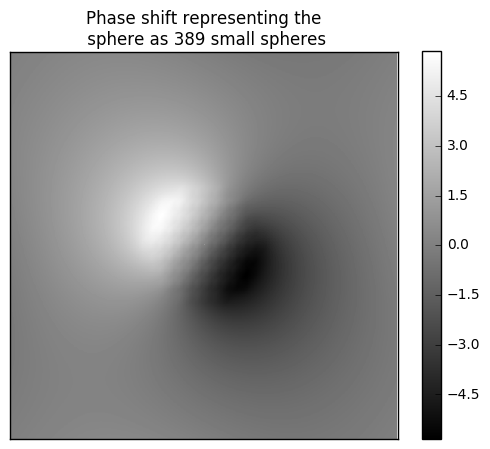

In [20]:
phi_m_grid = np.fft.fftshift(np.real(np.fft.ifft2(phi)))
plt.figure(figsize=(12.5/2,10/2))
plt.imshow(phi_m_grid, cmap='gray', interpolation='none', origin='lower')
plt.colorbar()
plt.yticks([])
plt.xticks([])
title = "Phase shift representing the\n sphere as %r small spheres" % len(i_s)
plt.title(title)
plt.show()

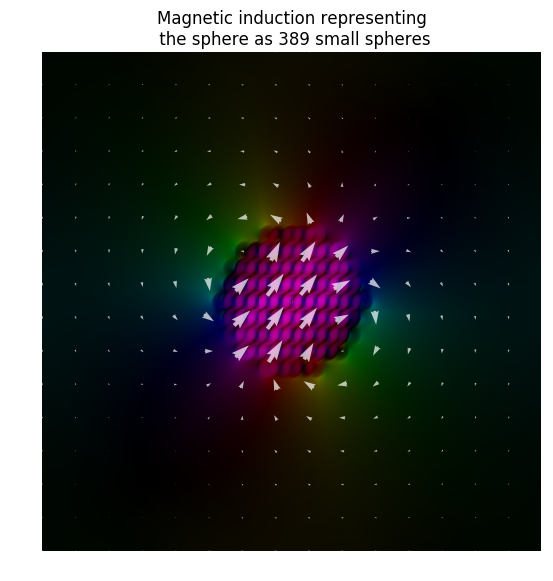

In [21]:
#  Make sure the magnetic induction looks correct 
G = np.gradient(phi_m_grid)
C = np.zeros(G[0].shape + (3,), dtype='float')
C[..., 0] = (np.arctan2(G[0],G[1]) + 3*np.pi/4 + np.pi/6)/ (2 * np.pi) % 1 
# these extra pis are to get the color wheel to look the way I want
C[..., 1] = 1
C[..., 2] = np.sqrt(G[0]**2 + G[1]**2)/2.04553232e-01
C = colors.hsv_to_rgb(C)
pix = 34
Bx = G[0][::pix,::pix]
By = -G[1][::pix,::pix]
XX, YY = np.meshgrid(np.linspace(0, np.shape(G[0])[1], np.shape(Bx)[1]), 
                   np.linspace(0, np.shape(G[0])[0], np.shape(By)[0]))

fig = plt.figure(frameon=0, figsize=(5, 5))
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
ax.imshow(C, origin='lower', interpolation='none')
ax.quiver(XX, YY, Bx, By, scale=2.5, minlength=0.0001, width=0.008, pivot='mid', 
          color='white', alpha=0.7)
title = "Magnetic induction representing\n the sphere as %r small spheres" % len(i_s)
plt.title(title)
plt.axis('off')
plt.show()

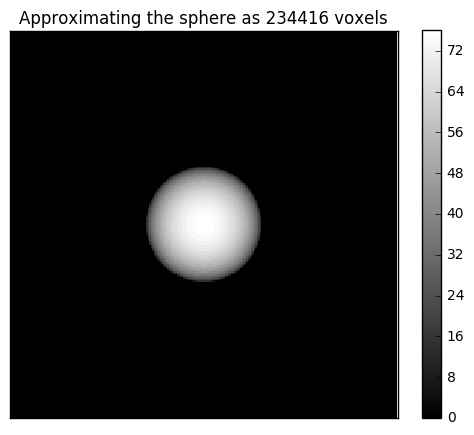

C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:53: RuntimeWarning: invalid value encountered in true_divide
  Sx = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*kx
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:53: RuntimeWarning: divide by zero encountered in true_divide
  Sx = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*kx
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:54: RuntimeWarning: invalid value encountered in true_divide
  Sy = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*ky
C:\Users\Jordan\Documents\GitHub\LTEM_tools\thick_sample_magnetic_phase.py:54: RuntimeWarning: divide by zero encountered in true_divide
  Sy = (((np.sin(kR)/(kR**2)-np.cos(kR)/(kR)))/(k_perp**3))*ky


In [22]:
w = 2.5*10**2
x_p, y_p, z_p = [np.linspace(-w,w,256)]*3
R = 75
data_p = f(*np.meshgrid(x_p, y_p, z_p, indexing='ij', sparse=True), R)
i_s, j_s, k_s = np.meshgrid(np.arange(len(x_p)), np.arange(len(y_p)), np.arange(len(z_p)), indexing='ij')
coords = np.array([i_s[data_p], j_s[data_p], k_s[data_p]])
i_s, j_s, k_s = coords
x0, y0, z0 = np.array([np.mean(i_s),np.mean(j_s),np.mean(k_s)])

plt.figure(figsize=(12.5/2,10/2))
plt.imshow(np.sum(data_p, axis=0), cmap='gray', interpolation='none', origin='lower')
plt.colorbar()
plt.yticks([])
plt.xticks([])
title = "Approximating the sphere as %r voxels" % len(i_s)
plt.title(title)
plt.show()

mu = np.array([np.array(data_p, dtype=float),np.array(data_p, dtype=float),0.0*np.array(data_p, dtype=float)])/np.sqrt(2)
a = (x_p[1]-x_p[0])/2
delta = 0.0
R = 1.2407*a
kx, ky, k_perp = tp.kx_ky_k_perp(pxsize/(2*np.pi), 512, 512)
Sx, Sy = tp.S_x_S_y(kx, ky, k_perp, R, 0.001)
mu_x, mu_y, mu_z = mu
phi = tp.phi_mk_delta(kx, ky, Sx, Sy, mu_x, mu_y, mu_z, a, delta, i_s, j_s, k_s, np.ones(np.shape(kx), dtype=np.complex128), x0, y0, z0)

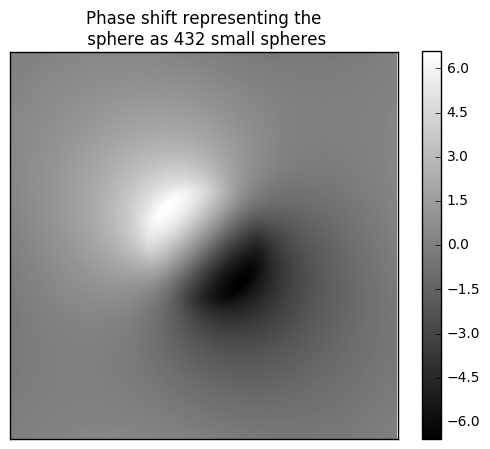

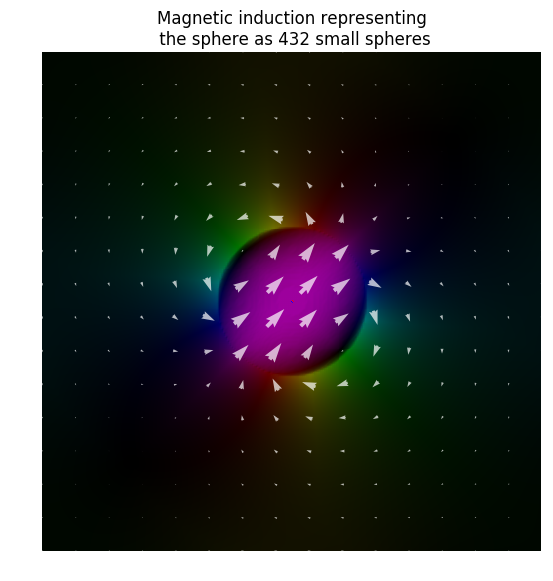

In [26]:
phi_m_grid = np.fft.fftshift(np.real(np.fft.ifft2(phi)))
plt.figure(figsize=(12.5/2,10/2))
plt.imshow(phi_m_grid, cmap='gray', interpolation='none', origin='lower')
plt.colorbar()
plt.yticks([])
plt.xticks([])
title = "Phase shift representing the\n sphere as %r small spheres" % len(i_s)
plt.title(title)
plt.show()

#  Make sure the magnetic induction looks correct 
G = np.gradient(phi_m_grid)
C = np.zeros(G[0].shape + (3,), dtype='float')
C[..., 0] = (np.arctan2(G[0],G[1]) + 3*np.pi/4 + np.pi/6)/ (2 * np.pi) % 1 
# these extra pis are to get the color wheel to look the way I want
C[..., 1] = 1
C[..., 2] = np.sqrt(G[0]**2 + G[1]**2)/2.04553232e-01
C = colors.hsv_to_rgb(C)
pix = 34
Bx = G[0][::pix,::pix]
By = -G[1][::pix,::pix]
XX, YY = np.meshgrid(np.linspace(0, np.shape(G[0])[1], np.shape(Bx)[1]), 
                   np.linspace(0, np.shape(G[0])[0], np.shape(By)[0]))

fig = plt.figure(frameon=0, figsize=(5, 5))
ax = plt.Axes(fig, [0., 0., 1., 1.])
fig.add_axes(ax)
ax.imshow(C, origin='lower', interpolation='none')
ax.quiver(XX, YY, Bx, By, scale=2.5, minlength=0.0001, width=0.008, pivot='mid', 
          color='white', alpha=0.7)
title = "Magnetic induction representing\n the sphere as %r small spheres" % len(i_s)
plt.title(title)
plt.axis('off')
plt.show()